In [196]:
from pathlib import Path

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona
from shapely.geometry import box
import matplotlib.pyplot as plt
import contextily as cx

from hydromt_sfincs import SfincsModel
from hydromt_sfincs import utils

In [4]:
# Initialize SfincsModel Python class with the artifact data catalog which contains publically available data for North Italy
# we overwrite (mode='w+') the existing model in the root directory if it exists
sf = SfincsModel(root="tmp_ngwpc_data", mode="w+")

In [15]:
huc_8 = "11070103"
base_data_path = Path("/Users/taddbindas/projects/hydromt_sfincs/examples/tmp_ngwpc_data")
output_geojson = base_data_path / f"output_{huc_8}.geojson"
huc8_data = base_data_path / "huc8s_sp.gpkg"
gdf = gpd.read_file(huc8_data)
subset  = gdf[gdf["HUC8"] == huc_8]
subset.to_file(output_geojson, driver='GeoJSON')
subset

,HUC8,median_slope,missing_median_slope,freq_high_dev,missing_freq_high_dev,percent_covered_by_tiles,geometry
811,11070103,0.018635,False,0.001553,False,93.398251,"MULTIPOLYGON (((48445.25 1602684.982, 48469.97..."


In [23]:
huc8_data = base_data_path / "nws_lid.gpkg"
ahps_gdf = gpd.read_file(huc8_data)
ahps_subset = ahps_gdf[ahps_gdf["HUC8"] == huc_8]
ahps_subset

,nwm_feature_id,nws_lid,usgs_site_code,HUC8,name,states,is_headwater,is_colocated,geometry
2072,21797175,CFVK1,None,11070103,Middle Verdigris,"KS,OK",0,0,POINT (32153.227 1557702.444)
2073,21796329,IDPK1,07170500,11070103,Middle Verdigris,"KS,OK",0,0,POINT (28324.056 1575868.523)
2074,21798265,LEPO2,07171000,11070103,Middle Verdigris,"KS,OK",0,0,POINT (36563.201 1534163.039)


In [42]:
rfc_loc = "CFVK1"
ahps_lid = ahps_subset[ahps_subset["nws_lid"] == rfc_loc]

In [193]:
conus_df = pd.read_parquet("/Users/taddbindas/hydrofabric/v20.1/conus_net.parquet")
filtered_df = conus_df[~pd.isna(conus_df['hl_uri'])]
conus_df.head()

,id,toid,divide_id,ds_id,mainstem,hl_id,hydroseq,hl_uri,hf_source,hf_id,lengthkm,areasqkm,tot_drainage_areasqkm,type,vpu,hf_areasqkm,hf_hydroseq
0,wb-280,tnx-1000000569,cat-280,NaN,1780414.0,01236,18917.0,HUC12-010100100101,NHDPlusV2,816563.0,5.135779,13.281300,51.687449,terminal,01,9.3258,2243683.0
1,wb-280,tnx-1000000569,cat-280,NaN,1780414.0,01236,18917.0,HUC12-010100100101,NHDPlusV2,816417.0,5.135779,13.281300,51.687449,terminal,01,1.9071,2243682.0
2,wb-280,tnx-1000000569,cat-280,NaN,1780414.0,01236,18917.0,HUC12-010100100101,NHDPlusV2,816415.0,5.135779,13.281300,51.687449,terminal,01,2.0484,2243689.0
3,wb-433,tnx-1000000056,cat-433,NaN,1780852.0,01244,18823.0,HUC12-010100110104,NHDPlusV2,818615.0,6.080505,8.605801,22.284001,terminal,01,7.0902,2244228.0
4,wb-433,tnx-1000000056,cat-433,NaN,1780852.0,01244,18823.0,HUC12-010100110104,NHDPlusV2,818525.0,6.080505,8.605801,22.284001,terminal,01,1.5111,2244227.0


In [57]:
# def find_location(loc_id: str) -> int:
#     location = filtered_df[filtered_df['hl_uri'].str.contains(loc_id)].iloc[-1]["hf_id"]
#     return location

rfc_loc = "CFVK1"
# comid_upstream = find_location(rfc_loc)

usgs_gage = "07171000"
filtered_df[filtered_df['hl_uri'].str.contains(usgs_gage)]
# comid_downstream = find_location(usgs_gage)
# print(f"RFC COMID upstream = {comid_upstream}, RFC COMID downstream = {comid_downstream}")

,id,toid,divide_id,ds_id,mainstem,hl_id,hydroseq,hl_uri,hf_source,hf_id,lengthkm,areasqkm,tot_drainage_areasqkm,type,vpu,hf_areasqkm,hf_hydroseq
2012331,wb-2175886,nex-2175887,cat-2175886,NaN,608934.0,111670,13821.0,Gages-07171000,NHDPlusV2,21798219.0,7.030249,9.443250,9281.407675,nexus,11,0.1827,339633.0
2012332,wb-2175886,nex-2175887,cat-2175886,NaN,608934.0,111670,13821.0,Gages-07171000,NHDPlusV2,21798233.0,7.030249,9.443250,9281.407675,nexus,11,7.2054,339520.0
2012333,wb-2175886,nex-2175887,cat-2175886,NaN,608934.0,111670,13821.0,Gages-07171000,NHDPlusV2,21798265.0,7.030249,9.443250,9281.407675,nexus,11,2.6973,339408.0
2142408,wb-2176967,nex-2175887,cat-2176967,NaN,612271.0,111670,13819.0,Gages-07171000,NHDPlusV2,21798527.0,6.026771,8.792099,8.792100,nexus,11,8.8056,1018327.0
2142409,wb-2176966,nex-2175887,cat-2176966,NaN,612269.0,111670,13820.0,Gages-07171000,NHDPlusV2,21798529.0,7.777258,14.992649,14.992650,nexus,11,14.9751,1018783.0


In [121]:
rfc_loc = "CFVK1"
filtered_df[filtered_df['hl_uri'].str.contains(rfc_loc)]

,id,toid,divide_id,ds_id,mainstem,hl_id,hydroseq,hl_uri,hf_source,hf_id,lengthkm,areasqkm,tot_drainage_areasqkm,type,vpu,hf_areasqkm,hf_hydroseq
2014022,wb-2177031,nex-2177032,cat-2177031,NaN,612479.0,11710,13692.0,AHPS-CFVK1,NHDPlusV2,21797123.0,8.243834,7.8741,7.874099,nexus,11,5.4495,341553.0
2014023,wb-2177031,nex-2177032,cat-2177031,NaN,612479.0,11710,13692.0,AHPS-CFVK1,NHDPlusV2,21797175.0,8.243834,7.8741,7.874099,nexus,11,0.5877,341424.0
2014024,wb-2177031,nex-2177032,cat-2177031,NaN,612479.0,11710,13692.0,AHPS-CFVK1,NHDPlusV2,21797125.0,8.243834,7.8741,7.874099,nexus,11,1.8621,1018400.0


In [205]:
import networkx as nx
gpkg = "/Users/taddbindas/hydrofabric/v20.1/gpkg/nextgen_11.gpkg"
flowlines = gpd.read_file(gpkg, layer="flowpaths")
nexus = gpd.read_file(gpkg, layer="nexus")
divides = gpd.read_file(gpkg, layer="divides")


In [170]:
# import matplotlib.pyplot as plt
# import contextily as cx

# fig, ax = plt.subplots(figsize=(10, 10))

# # Plot the original data
# flowlines.plot(ax=ax, alpha=0.5)

# cx.add_basemap(ax, crs=flowlines.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# # Set the title and remove axis
# plt.title('Plotting the sample network')
# ax.axis('off')

# # Display the plot
# plt.tight_layout()
# plt.show()

In [181]:
G = nx.DiGraph()
nexus_to_toid = dict(zip(nexus['id'], nexus['toid']))
for _, node in nexus.iterrows():
    G.add_node(node['id'], 
               type=node['type'], 
               geometry=node['geometry'],
               toid=node['toid'])

for _, edge in flowlines.iterrows():
    G.add_edge(edge['id'], edge['toid'], 
               mainstem=edge['mainstem'],
               order=edge['order'],
               hydroseq=edge['hydroseq'],
               lengthkm=edge['lengthkm'],
               areasqkm=edge['areasqkm'],
               tot_drainage_areasqkm=edge['tot_drainage_areasqkm'],
               has_divide=edge['has_divide'],
               divide_id=edge['divide_id'],
               geometry=edge['geometry'])
    
    if edge['toid'] in nexus_to_toid:
        G.add_edge(edge['toid'], nexus_to_toid[edge['toid']])



# Print some basic information about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Example of accessing node attributes
print("\nExample node attributes:")
example_node = list(G.nodes())[0]
print(f"Attributes of node {example_node}:")
print(G.nodes[example_node])

# Example of accessing edge
print("\nExample edge:")
example_edge = list(G.edges())[0]
print(f"Edge: {example_edge}")

Number of nodes: 92211
Number of edges: 92156

Example node attributes:
Attributes of node nex-1000006131:
{'type': 'nexus', 'geometry': <POINT (-411313.625 1707430.743)>, 'toid': 'wb-1000006131'}

Example edge:
Edge: ('nex-1000006131', 'wb-1000006131')


In [188]:
start_node = "nex-2177032"
end_node = "nex-2175887"
path = nx.shortest_path(G, start_node, end_node)
# descendants = set(nx.descendants(G, start_node))
path

['nex-2177032',
 'wb-2177032',
 'nex-2175879',
 'wb-2175879',
 'nex-2175880',
 'wb-2175880',
 'nex-2175881',
 'wb-2175881',
 'nex-2175882',
 'wb-2175882',
 'nex-2175883',
 'wb-2175883',
 'nex-2175884',
 'wb-2175884',
 'nex-2175885',
 'wb-2175885',
 'nex-2175886',
 'wb-2175886',
 'nex-2175887']

In [209]:
mask_flowlines = flowlines["id"].isin(path) | flowlines["toid"].isin(path)
mask_nexus = nexus["id"].isin(path)
mask_divides = divides["id"].isin(path)

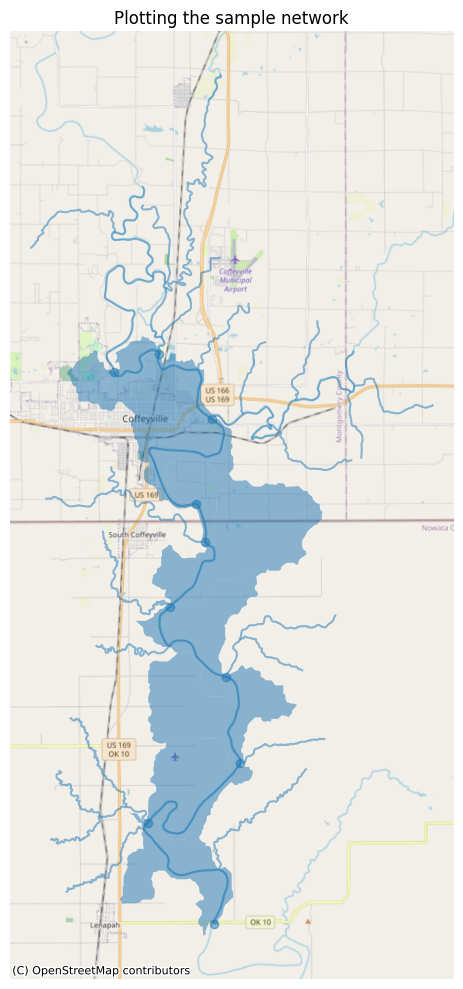

In [210]:
_subset_nexus = nexus[mask_nexus]
_subset_flowlines = flowlines[mask_flowlines]
_subset_divides = divides[mask_divides]
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the original data
_subset_nexus.plot(ax=ax, alpha=0.5)
_subset_flowlines.plot(ax=ax, alpha=0.5)
_subset_divides.plot(ax=ax, alpha=0.5)

cx.add_basemap(ax, crs=_subset_nexus.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Set the title and remove axis
plt.title('Plotting the sample network')
ax.axis('off')

# Display the plot
plt.tight_layout()
plt.show()

In [204]:
layers = fiona.listlayers("/Users/taddbindas/hydrofabric/v20.1/gpkg/nextgen_11.gpkg")
layers

['hydrolocations',
 'nexus',
 'flowpaths',
 'lakes',
 'divides',
 'network',
 'flowpath_attributes',
 'layer_styles']

In [ ]:
plt.figure(figsize=(20, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
plt.axis('off')
plt.tight_layout()
plt.show()

In [116]:
_subset

,id,toid,mainstem,order,hydroseq,lengthkm,areasqkm,tot_drainage_areasqkm,has_divide,divide_id,geometry
2,wb-1074883,nex-1074884,1216759.0,3.0,43645,6.002203,3.570750,174.874495,1,cat-1074883,"MULTILINESTRING ((450811.321 1798860.783, 4508..."
3,wb-1074884,nex-1074885,1216759.0,3.0,43656,7.325934,8.962650,247.383894,1,cat-1074884,"MULTILINESTRING ((452246.965 1793440.828, 4522..."
4,wb-1074886,nex-1074884,1216772.0,1.0,43632,5.197669,7.602750,7.602750,1,cat-1074886,"MULTILINESTRING ((448105.43 1796491.521, 44815..."
13,wb-1074905,nex-1074884,1216880.0,1.0,43642,7.049036,5.600250,5.600250,1,cat-1074905,"MULTILINESTRING ((453212.471 1801446.848, 4532..."
16,wb-1074910,nex-1074884,1216901.0,2.0,43655,8.528401,13.159349,63.546749,1,cat-1074910,"MULTILINESTRING ((446498.491 1793117.923, 4465..."
21,wb-1074913,nex-1074884,1216912.0,1.0,43650,3.636095,3.118500,3.118500,1,cat-1074913,"MULTILINESTRING ((446530.345 1796265.411, 4467..."
22,wb-1074915,nex-1074884,1216914.0,1.0,43652,3.477534,8.384850,13.983749,1,cat-1074915,"MULTILINESTRING ((444880.017 1795331.593, 4448..."
23,wb-1074911,nex-1074884,1216902.0,1.0,43653,3.932950,3.884850,3.884850,1,cat-1074911,"MULTILINESTRING ((448166.711 1795588.338, 4481..."
24,wb-1074912,nex-1074911,1216906.0,1.0,43654,2.817278,3.830400,3.830400,1,cat-1074912,"MULTILINESTRING ((449233.096 1795576.449, 4492..."


TODO:
- Figure out the correct subsetting of catchments from the subsetting tool
- define the catchments to be used within FIM
- get all of the other materials together for the SFINCS processing

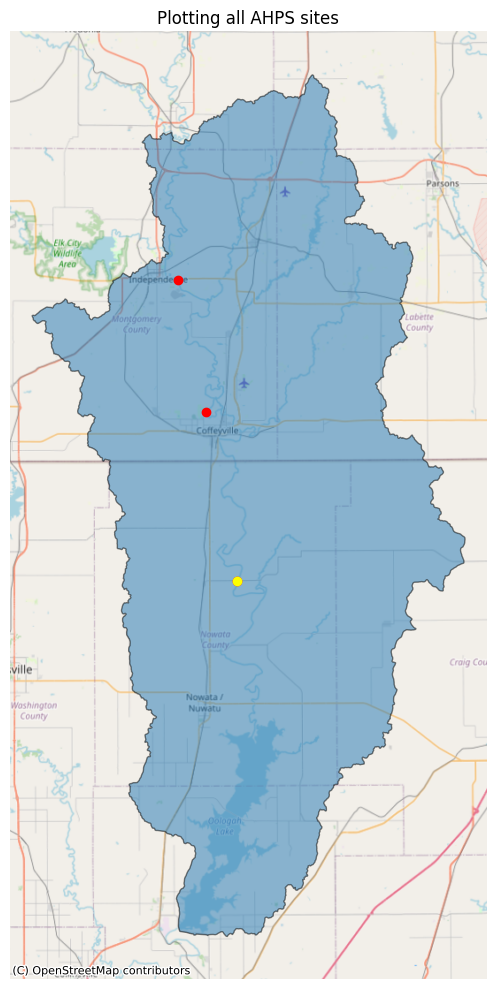

In [41]:
import matplotlib.pyplot as plt
import contextily as cx

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the original data
subset.plot(ax=ax, alpha=0.5, edgecolor='k')

# Plot the bounding box
ahps_subset.plot(ax=ax, color='red')
ahps_lid.plot(ax=ax, color='yellow', marker="o")

cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

# Set the title and remove axis
plt.title('Plotting all AHPS sites')
ax.axis('off')

# Display the plot
plt.tight_layout()
plt.show()

### Step 1: Set up Grid

- This is the bounding box around the catchments of interest

In [17]:
sf.setup_grid_from_region(
    region = {'geom': 'tmp_ngwpc_data/output_11070103.geojson'},
    res= 50,
    rotated=True,
    crs=5070  # NAD83 / Conus Albers HARDCODED
)
# the input file is automatically updated. Uncomment to displayed below:
print(sf.config)

{'mmax': 1067, 'nmax': 2305, 'dx': 50, 'dy': 50, 'x0': 25951.0, 'y0': 1482591.0, 'rotation': 11.441, 'latitude': 0.0, 'tref': datetime.datetime(2010, 2, 1, 0, 0), 'tstart': datetime.datetime(2010, 2, 1, 0, 0), 'tstop': datetime.datetime(2010, 2, 2, 0, 0), 'tspinup': 60.0, 'dtout': 3600.0, 'dthisout': 600.0, 'dtrstout': 0.0, 'dtmaxout': 86400, 'trstout': -999.0, 'dtwnd': 1800.0, 'alpha': 0.5, 'theta': 1.0, 'huthresh': 0.01, 'manning': 0.04, 'manning_land': 0.04, 'manning_sea': 0.02, 'rgh_lev_land': 0.0, 'zsini': 0.0, 'qinf': 0.0, 'rhoa': 1.25, 'rhow': 1024.0, 'dtmax': 60.0, 'advection': 1, 'baro': 0, 'pavbnd': 0, 'gapres': 101200.0, 'stopdepth': 100.0, 'crsgeo': 0, 'btfilter': 60.0, 'viscosity': 1, 'inputformat': 'bin', 'outputformat': 'net', 'cdnrb': 3, 'cdwnd': [0.0, 28.0, 50.0], 'cdval': [0.001, 0.0025, 0.0015], 'epsg': 5070}


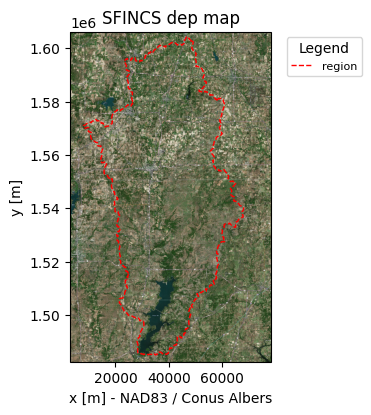

In [18]:
# show the model grid outline
# sf.region.boundary.plot(figsize=(6,6))
_ = sf.plot_basemap(plot_region=True, bmap="sat", zoomlevel=12)

### Step 2: Load in Elevation Data

In [ ]:
datasets_dep = [{"elevtn": "merit_hydro", "zmin": 0.001}, {"elevtn": "gebco"}]

# Add depth information to modelgrid based on these chosen datasets
dep = sf.setup_dep(datasets_dep=datasets_dep)

# Make a plot of the merged topobathy, here colour limits are set between an elevation of -5 to 5 meters
_ = sf.plot_basemap(variable="dep", bmap="sat", zoomlevel=12)

In [131]:
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Read the GeoJSON file
# gdf = gpd.read_file('/Users/taddbindas/projects/hydromt_sfincs/examples/tmp_ngwpc_data/01070006-nchn3-usgs.json')

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(12, 8))

# # Plot the GeoDataFrame
# gdf.plot(ax=ax)

# # Add some basic styling
# ax.set_title('GeoJSON Plot')
# ax.set_axis_off()  # Turn off axis

# # Add a simple north arrow
# ax.annotate('N', xy=(0.9, 0.9), xycoords='axes fraction', 
#             horizontalalignment='center', verticalalignment='center',
#             fontsize=20, fontweight='bold')

# # Add a scale bar (this is a simple approximation)
# gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
# ax.plot([0.9, 0.95], [0.1, 0.1], transform=ax.transAxes, color='k', linewidth=2)
# ax.text(0.925, 0.08, '5 km', transform=ax.transAxes, 
#         horizontalalignment='center', verticalalignment='center')
# cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)


# plt.tight_layout()
# plt.show()